In [1]:
import pandas as pd
import gensim
import os
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import pickle
import pyLDAvis
import re
import nltk
from wordcloud import WordCloud

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('pdfConvertFULL.csv', sep = '|')

In [3]:
df.head()

,Unnamed: 0,0,1
0,0,"IS 100 A, ONL SP21 Exploring the iSchool (Torr...",exploring the ischool with a humancentered len...
1,1,"IS 567 BC FA22 Text Mining (Blake, C).pdf",syllabus for is567 ac text mining fall 2022...
2,2,"IS 507 AC, BC FA22 Data, Stat, Info (Besser, S...",course instructor information course and inst...
3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...
4,4,IS 584 PVO FA20 Privacy in the Internet Age (B...,privacy in the internet age lis 584 pvo fall 2...


In [4]:
courseNumbers = []
firstval = []
for i in df['0']:
    if i[0] == 'I' and i[1] == 'S':
        courseNumbers.append(int(i[3:6]))
    elif i[0] == 'G':
        courseNumbers.append(int(i[4:7]))
    elif i[0] == 'I' and i[1] == 'N':
        courseNumbers.append(int(i[5:8]))
    elif i[0] == 'W':
        courseNumbers.append(int(i[5:8]))
    firstval.append(i[0])
courseNumbers.append(0)

df['courseNumbers'] = courseNumbers

In [5]:
df = df[df['courseNumbers'] >= 400]

In [6]:
df.head()

,Unnamed: 0,0,1,courseNumbers
1,1,"IS 567 BC FA22 Text Mining (Blake, C).pdf",syllabus for is567 ac text mining fall 2022...,567
2,2,"IS 507 AC, BC FA22 Data, Stat, Info (Besser, S...",course instructor information course and inst...,507
3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,413
4,4,IS 584 PVO FA20 Privacy in the Internet Age (B...,privacy in the internet age lis 584 pvo fall 2...,584
5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...,458


In [7]:
import re
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize as wt 

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#spell correction
#from autocorrect import spell

data = []

for i in range(df.shape[0]):
    sms = df.iloc[i, 2]

    # remove non alphabatic characters
    sms = re.sub('[^A-Za-z]', ' ', sms)

    # make words lowercase, because Go and go will be considered as two words
    sms = sms.lower()

    # tokenising
    tokenized_sms = wt(sms)

    # remove stop words and stemming
 
    sw = stopwords.words('english')
    #sw.extend(['cid','student','cours','class','assign','inform','read','week','grade','univers','use','work','learn',
#'instructor','due','academi','requir','may','illinoi','complet','pleas','materi','ischool','respons','meet','lectur','final',
#'librari','academ','includ','resourc','contact','must'])

    sms_processed = []
    for word in tokenized_sms:
        if word not in set(sw):
            sms_processed.append((stemmer.stem(word)))

    sms_text = " ".join(sms_processed)
    data.append(sms_text)

#df['processedText'] = data

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fjsti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


c:\Users\fjsti\realCode\standardizedTest-fairness\.conda\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


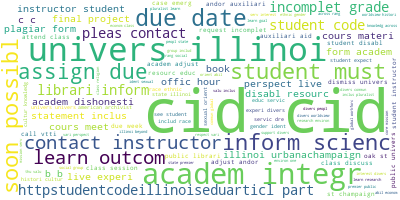

In [8]:
long_string = ','.join(list(data))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [9]:
sw = stopwords.words('english')
sw.extend(['cid','student','cours','class','assign','inform','read','week','grade','univers','use','work','learn',
'instructor','due','academi','requir','may','illinoi','complet','pleas','materi','ischool','respons','meet','lectur','final',
'librari','academ','includ','resourc','contact','must'])

def s2w(sent):
    for sentence in sent:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def removeSW(txt):
    return [[word for word in simple_preprocess(str(doc)) if word not in sw] for doc in txt]

In [10]:
#data = df.processedText.values.tolist()
dataWords = list(s2w(data))

dataWords = removeSW(dataWords)
print(dataWords[:1][0][:30])

['syllabu', 'ac', 'text', 'mine', 'fall', 'credit', 'hour', 'oper', 'detail', 'dr', 'catherin', 'blake', 'email', 'phone', 'teacher', 'assist', 'ryan', 'wang', 'email', 'hywang', 'illinoisedu', 'time', 'room', 'daniel', 'st', 'tuesday', 'offic', 'hour', 'tuesday', 'pm']


In [11]:
id2word = corpora.Dictionary(dataWords)
txts = dataWords
corpus = [id2word.doc2bow(text) for text in txts]
print(corpus[:1][0][:30])

[(0, 1), (1, 6), (2, 1), (3, 1), (4, 1), (5, 1), (6, 4), (7, 1), (8, 6), (9, 1), (10, 2), (11, 2), (12, 4), (13, 1), (14, 1), (15, 7), (16, 3), (17, 2), (18, 1), (19, 2), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2)]


In [12]:
pyLDAvis.enable_notebook()

In [13]:
#LDAvis_data_filepath = os.path.join('./resultsUNDERGRAD/ldavis_prepared_'+str(num_topics))

In [14]:
from gensim.models import CoherenceModel

In [16]:
max_coherence = -1
best_lda_model = None
best_lda_model_path = ''
for num_topics in range(2,10):
    
    # number of topics
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)
    # Print the Keyword in the 10 topics
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]

    pyLDAvis.enable_notebook()
    LDAvis_data_filepath = os.path.join('./resultsGRAD/ldavis_prepared_'+str(num_topics))

    coherence_model = CoherenceModel(model = lda_model, texts = txts, dictionary=id2word)

    coherence_value = coherence_model.get_coherence()

    if coherence_value > max_coherence:
        max_coherence = coherence_value
        best_lda_model = lda_model
        best_lda_model_path = LDAvis_data_filepath

    if 1 == 1:
        LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
        with open(LDAvis_data_filepath, 'wb') as f:
            pickle.dump(LDAvis_prepared, f)
    # load the pre-prepared pyLDAvis data from disk
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
    pyLDAvis.save_html(LDAvis_prepared, './resultsGRAD/ldavis_prepared_'+ str(num_topics) +'.html')
    #LDAvis_prepared

[(0,
  '0.006*"discuss" + 0.005*"commun" + 0.005*"research" + 0.004*"data" + '
  '0.004*"servic" + 0.004*"design" + 0.004*"one" + 0.004*"particip" + '
  '0.004*"integr" + 0.004*"present"'),
 (1,
  '0.006*"discuss" + 0.005*"commun" + 0.005*"research" + 0.005*"write" + '
  '0.004*"point" + 0.004*"group" + 0.004*"project" + 0.004*"present" + '
  '0.004*"servic" + 0.004*"particip"')]
[(0,
  '0.005*"commun" + 0.005*"discuss" + 0.005*"data" + 0.005*"research" + '
  '0.004*"particip" + 0.004*"servic" + 0.004*"group" + 0.004*"one" + '
  '0.004*"provid" + 0.004*"write"'),
 (1,
  '0.007*"discuss" + 0.005*"project" + 0.005*"commun" + 0.005*"research" + '
  '0.005*"point" + 0.004*"servic" + 0.004*"present" + 0.004*"group" + '
  '0.004*"particip" + 0.004*"one"'),
 (2,
  '0.006*"discuss" + 0.005*"commun" + 0.005*"write" + 0.005*"research" + '
  '0.004*"present" + 0.004*"practic" + 0.004*"group" + 0.004*"need" + '
  '0.004*"servic" + 0.004*"one"')]
[(0,
  '0.006*"discuss" + 0.006*"commun" + 0.005*"re

In [ ]:
best_lda_model_path

'./resultsUNDERGRAD/ldavis_prepared_3'

In [ ]:
best_lda_model.show_topic(0)

[('data', 0.0061270115),
 ('commun', 0.0057457485),
 ('discuss', 0.0053870496),
 ('design', 0.0050209602),
 ('write', 0.004277122),
 ('particip', 0.004276984),
 ('research', 0.0040536933),
 ('provid', 0.0040257354),
 ('expect', 0.003854916),
 ('need', 0.003811144)]

In [ ]:
classifications = best_lda_model.get_document_topics(corpus)

In [ ]:
df['topics'] = classifications

In [ ]:
df.head()

,Unnamed: 0,0,1,courseNumbers,topics
0,0,"IS 100 A, ONL SP21 Exploring the iSchool (Torr...",exploring the ischool with a humancentered len...,100,"[(0, 0.017419554), (1, 0.90658754), (2, 0.0759..."
3,3,"IS 413 BO SP21 Teen Materials (Quealy, K).pdf",1 is 413ab sp1 teen materials spring 2021 mond...,413,"[(0, 0.4334025), (1, 0.03019826), (2, 0.5363992)]"
5,5,IS 458 AO FA19 Instruc Strat Tech Info Prof (W...,is458\tinstructional\tstrategies\tand\ttechniq...,458,"[(0, 0.08952905), (1, 0.90728205)]"
6,6,"IS 401 ACG, ACU FA22 Introduction to Networked...",1 introduction to networked information...,401,"[(0, 0.6108254), (1, 0.1912857), (2, 0.19788882)]"
7,7,GSD 102 AL FA22 Intro to the Videogame Industr...,gsd 102 introduction to the video game industr...,102,"[(2, 0.9987778)]"


In [ ]:
df.to_csv('pdfConvertwTopicsGRAD.csv', escapechar='\\', sep = '|')